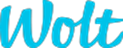
## <p style="font-family:verdana; font-weight:bold; letter-spacing: 2px; color:#0000FF; font-size:120%; text-align:left;padding: 0px; border-bottom: 3px solid #1975D2"> 🏗️ Wolt Market in Finland - Customer Segmentation </p>
 
<div style="border-radius:10px; border:##1975D2 solid; padding: 15px; background-color: #FFFAF0; font-size:110%; text-align:left">

<h3 align="left"><font color='#0000FF'> 📌 Project Objectives:</font></h3>

> * **Data Description**: Every row of the dataset represents one customer who has registered to use the service during September 2019 and either has or hasn’t made orders during the time from then and October 2020.

> * **The assignment**: to create a user segmentation that helps Wolt understand what type of users they have.
>> + Need to understand well the dataset and present the exploratory data analysis (EDA) skills. 
>> + Need to justify the segmentation approach, instead of an arbitrary solution by a non-data analyst just with slicing-and-dicing with the data.
     
<h3 align="left"><font color='#0000FF'> 📌 <b>Key Questions:</font></h3></b><br>

> <b> 1. How many customer segments Wolt might have? Who they are? How much they ordered? how often and when they ordered?</b><br>
> <b> 2. Who are the top value customers? What make them differentiated? How to maintain this group</b><br>
> <b> 3. Who are regular customers? What are main characteristics & How to promote this cluster</b><br>
> <b> 4. Who are leaving customers? What make them stopped using the services & How to retend this cluster</b><br>
> <b> 5. Who are once-users? What make them stopped using the services? What we can do to make them start again</b><br>
> <b> 6. Who are non-users? Main characteristics, demographic info? Why they registered but not started using service</b><br>
    

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#1975D2;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#006600;"> Table of Contents </h3>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="home" target="_self" style = "color:#0000FF; font-family:Charter;font-size:150%;">PART 1 : PACKAGES & DATA PREPARATION <span class="badge badge-primary badge-pill">I</span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA UNDERSTANDING <span class="badge badge-primary badge-pill">1.1</span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA EXPLORATION <span class="badge badge-primary badge-pill">1.2</span></a>
            <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:120%;">#    DATA PREPROCESSING <span class="badge badge-primary badge-pill">1.3</span></a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#0000FF; font-family:Charter;font-size:150%;">PART 2 : CUSTOMER SEGMENTATION WITH RFM METRICS<span class="badge badge-primary badge-pill">III</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#10" role="tab" aria-controls="messages" target="_self" style = "color:#0000FF; font-family:Charter;font-size:150%;">PART 3 : CUSTOMER SEGMENTS WITH EDA <span class="badge badge-primary badge-pill">III</span></a>

</div>
</div>
</div>


<a id = "1"></a>
### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#0000FF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1975D2"> 🧐 PART 1 - Library Preparation & Data Exploration</p></div>


In [1]:
### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

import datetime as dt
sns.set_style('whitegrid')
palette = 'Set1'
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
### Import dataset for analysis
data = pd.read_csv('Wolt_Customer_segmentation.csv')

<a id = "2"></a>
## <h2 align="center"><font color='#1975D2'>  <b> ※ DATA UNDERSTANDING </font></h2></b><br></div>

<h3 align="left"><font color='#006600'> 📌 <b><u> Define some functions:</font></h3></u></b><br>


In [3]:
## Show dataset in details 
def check(df):
    print(" SHAPE ".center(70,'-'))
    print("Row: {}".format(df.shape[0]))
    print(f"Column: {df.shape[1]}")
    
    summary=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        count_col = df[col].count()
        """ 
        mean_col = df[col].mean()
        min_col = df[col].min()
        max_col = df[col].max()
        """
        summary.append([col,dtypes,nunique,sum_null, count_col])
    
    df_check=pd.DataFrame(summary)
    df_check.columns=['column','dtypes','nunique','sum_null','count']
    
    print(" DUPLICATED VALUES".center(70, '-'))
    print(df.duplicated().sum())
    #print(" DESCRIBE ".center(70,'-'))
    #print(df.describe().T)
    print(" DATA SUMMARY ".center(70, '-'))
    
    return df_check

In [4]:
check(data)

------------------------------- SHAPE --------------------------------
Row: 21983
Column: 30
-------------------------- DUPLICATED VALUES--------------------------
0
---------------------------- DATA SUMMARY ----------------------------


column   dtypes  nunique  sum_null  count
0                         REGISTRATION_DATE   object       30         0  21983
1                      REGISTRATION_COUNTRY   object       59         0  21983
2                            PURCHASE_COUNT    int64      107         0  21983
3                   PURCHASE_COUNT_DELIVERY  float64      106      9955  12028
4                   PURCHASE_COUNT_TAKEAWAY  float64       26      9955  12028
5                        FIRST_PURCHASE_DAY   object      426     10019  11964
6                         LAST_PURCHASE_DAY   object      427      9956  12027
7                                   USER_ID    int64    21983         0  21983
8                       BREAKFAST_PURCHASES  float64       22      9955  12028
9                           LUNCH_PURCHASES  float64       67      9955  12028
10                        EVENING_PURCHASES  float64       31      9955  12028
11                         DINNER_PURCHASES  float64       57      9955  12028
12                     LATE_NIGHT_PURCHASES  float64        1      9955  12028
13                      TOTAL_PURCHASES_EUR  float64     1088      9955  12028
14            DISTINCT_PURCHASE_VENUE_COUNT  float64       40      9955  12028
15                   MIN_PURCHASE_VALUE_EUR  float64      153      9955  12028
16                   MAX_PURCHASE_VALUE_EUR  float64      224      9955  12028
17                   AVG_PURCHASE_VALUE_EUR  float64      168      9955  12028
18                         PREFERRED_DEVICE   object        3        73  21910
19                            IOS_PURCHASES  float64       79      9955  12028
20                            WEB_PURCHASES  float64       65      9955  12028
21                        ANDROID_PURCHASES  float64       76      9955  12028
22               PREFERRED_RESTAURANT_TYPES   object      247     19289   2694
23            USER_HAS_VALID_PAYMENT_METHOD     bool        2         0  21983
24  MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  float64       24      9955  12028
25          MOST_COMMON_WEEKDAY_TO_PURCHASE  float64        7      9955  12028
26               AVG_DAYS_BETWEEN_PURCHASES  float64      392     14151   7832
27            MEDIAN_DAYS_BETWEEN_PURCHASES  float64      392     14151   7832
28            AVERAGE_DELIVERY_DISTANCE_KMS  float64     7577      9955  12028
29             PURCHASE_COUNT_BY_STORE_TYPE   object      107         0  21983

In [5]:
print("The information of customers ordered at late nights: ", data['LATE_NIGHT_PURCHASES'].value_counts())
### We can drop this column as unnecessary info
data = data.drop(columns = ['LATE_NIGHT_PURCHASES'], axis = 1)

### Since the values btw AVG & MEDIAN days btw purchases are much identical / positively correlated, I decide to drop this column as unnecessary info
data = data.drop(columns = ['MEDIAN_DAYS_BETWEEN_PURCHASES'], axis = 1)

The information of customers ordered at late nights:  0.000    12028
Name: LATE_NIGHT_PURCHASES, dtype: int64


In [7]:
data['USER_HAS_VALID_PAYMENT_METHOD'] =  data['USER_HAS_VALID_PAYMENT_METHOD'].apply(lambda x: 1 if x else 0)
### Here we can check the number of customers with valid payment method:
data['USER_HAS_VALID_PAYMENT_METHOD'].sum()

7568

In [8]:
data[data['PURCHASE_COUNT'] == 1]['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts()
#data['MOST_COMMON_WEEKDAY_TO_PURCHASE'].sum()

data[data['PURCHASE_COUNT'] > 1]['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts()

7.000    1178
4.000    1166
1.000    1133
2.000    1110
3.000    1097
6.000    1093
5.000    1072
Name: MOST_COMMON_WEEKDAY_TO_PURCHASE, dtype: int64

In [9]:
### We create 02 columns which can help for data visuals later
data['registers'] = 1
data['users'] = data['PURCHASE_COUNT'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
### Define a function in order to transfer date column from string into datetime and add time columns for further analysis
def str_to_date(df, col):
    
    df[col]= pd.to_datetime(df[col]) ### .dt.date  ### Important to keep .dt.date, helping to reduce the datatype if you face with memory issue
    df['Year'] = df[col].apply(lambda x: x.year)
    df['Month'] = df[col].apply(lambda x: x.month)
    
    df['Day'] = df[col].apply(lambda x: x.day)
    df['Year_month'] = df[col].apply(lambda x: x.to_period('M')) ## can not use with .dt.date
    
    df['Week_day'] = df[col].apply(lambda x: x.dayofweek)  ## other: x.weekday() with .dt.date
    #maps = dict(zip(range(0,7), "Mon Tue Wed Thu Fri Sat Sun".split()))
    #df['Week_day'] = df['Week_day'].map(maps)
    
    ### Note: run this code afterall
    df[col] = df[col].apply(lambda x: x.date()) # return a column for certain date in year - 2015-12-10
    
    return df

In [12]:
### Define a simple function in order to transfer date column from string into datetime
def return_date(df, col):
    
    df[col]= pd.to_datetime(df[col])
    df[col] = df[col].apply(lambda x: x.date()) # return a column for certain date in year - 2015-12-10
    
    return df

In [13]:
### Extract and Transfer all date columns from string type into datetime type
data['REGISTRATION_DATE'] = data['REGISTRATION_DATE'].str.split(' ', expand=True)[0]
data['FIRST_PURCHASE_DAY'] = data['FIRST_PURCHASE_DAY'].str.split(' ', expand=True)[0]
data['LAST_PURCHASE_DAY'] = data['LAST_PURCHASE_DAY'].str.split(' ', expand=True)[0]


In [14]:
data.head()

REGISTRATION_DATE REGISTRATION_COUNTRY  PURCHASE_COUNT  \
0        2019-09-01                  DNK               0   
1        2019-09-01                  FIN               1   
2        2019-09-01                  DNK              19   
3        2019-09-01                  FIN               0   
4        2019-09-01                  GRC               0   

   PURCHASE_COUNT_DELIVERY  PURCHASE_COUNT_TAKEAWAY FIRST_PURCHASE_DAY  \
0                      NaN                      NaN                NaN   
1                    1.000                    0.000         2020-09-02   
2                   19.000                    0.000         2019-12-10   
3                      NaN                      NaN                NaN   
4                      NaN                      NaN                NaN   

  LAST_PURCHASE_DAY  USER_ID  BREAKFAST_PURCHASES  LUNCH_PURCHASES  ...  \
0               NaN        1                  NaN              NaN  ...   
1        2020-09-02        2                0.000            1.000  ...   
2        2020-05-25        3                0.000            4.000  ...   
3               NaN        4                  NaN              NaN  ...   
4               NaN        5                  NaN              NaN  ...   

   ANDROID_PURCHASES  PREFERRED_RESTAURANT_TYPES  \
0                NaN                         NaN   
1              1.000                         NaN   
2              0.000                         NaN   
3                NaN                         NaN   
4                NaN                         NaN   

   USER_HAS_VALID_PAYMENT_METHOD  MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE  \
0                              0                                      NaN   
1                              0                                   23.000   
2                              1                                   21.000   
3                              0                                      NaN   
4                              0                                      NaN   

   MOST_COMMON_WEEKDAY_TO_PURCHASE  AVG_DAYS_BETWEEN_PURCHASES  \
0                              NaN                         NaN   
1                            2.000                         NaN   
2                            2.000                       9.000   
3                              NaN                         NaN   
4                              NaN                         NaN   

   AVERAGE_DELIVERY_DISTANCE_KMS  \
0                            NaN   
1                          6.853   
2                          6.559   
3                            NaN   
4                            NaN   

                        PURCHASE_COUNT_BY_STORE_TYPE  registers  users  
0  {\n  "General merchandise": 0,\n  "Grocery": 0...          1      0  
1  {\n  "General merchandise": 0,\n  "Grocery": 0...          1      1  
2  {\n  "General merchandise": 1,\n  "Grocery": 9...          1      1  
3  {\n  "General merchandise": 0,\n  "Grocery": 0...          1      0  
4  {\n  "General merchandise": 0,\n  "Grocery": 0...          1      0  

[5 rows x 30 columns]

<a id = "3"></a>
## <h2 align="center"><font color='#1975D2'>  <b> ※ DATA EXPLORATION </font></h2></b><br></div>

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Graph 01: Group of customers by number of purchases:</b><br> 

+ The count of purchase is from 09.2019 up to 10.2020: 13 months / ~ 56 week / ~ 396 days
   
+ Here, I start with the basic assumption with ONE order per month on average
    
</div>


In [15]:
### 
wolt_summary = data.groupby(['PURCHASE_COUNT'])[['registers','users', 'TOTAL_PURCHASES_EUR']].sum().reset_index()
### We calculate the proportion of users
total_registers = len(data)
wolt_summary['%share_register'] = wolt_summary['registers']/ total_registers

total_users = wolt_summary['users'].sum()
wolt_summary['%share_users'] = wolt_summary['users']/ total_users

total_sales = wolt_summary['TOTAL_PURCHASES_EUR'].sum()
wolt_summary['%sales_group'] = wolt_summary['TOTAL_PURCHASES_EUR']/ total_sales

wolt_summary.rename(columns = {'PURCHASE_COUNT' : 'USER_GROUP'}, inplace = True)

wolt_summary.head()

USER_GROUP  registers  users  TOTAL_PURCHASES_EUR  %share_register  \
0           0       9955      0                0.000            0.453   
1           1       4179   4179           133548.580            0.190   
2           2       1821   1821           116094.616            0.083   
3           3       1148   1148           109890.044            0.052   
4           4        835    835           103973.892            0.038   

   %share_users  %sales_group  
0         0.000         0.000  
1         0.347         0.063  
2         0.151         0.055  
3         0.095         0.052  
4         0.069         0.049

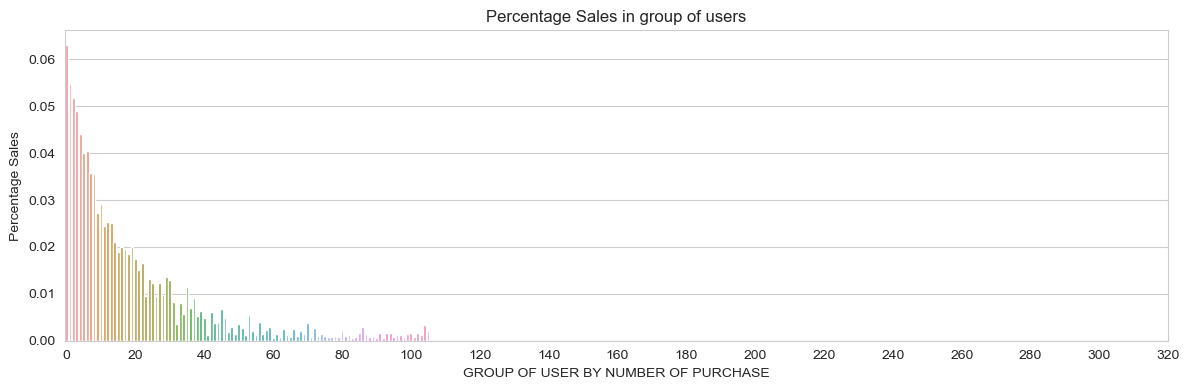

In [16]:
### Make  the barplot for purchase_count and sales figures:
plt.figure(figsize=(12,4))
sns.barplot(data=wolt_summary[wolt_summary.USER_GROUP > 0], y='%sales_group', x='USER_GROUP')

plt.xlabel('GROUP OF USER BY NUMBER OF PURCHASE')
plt.ylabel('Percentage Sales')
plt.xticks(range(0,330,20), ['0','20','40','60','80','100','120','140','160','180','200','220','240','260','280','300','320'])
plt.title('Percentage Sales in group of users')
plt.tight_layout()

##### <h3 align="left"><font color='#006600'> 📌 <b><u>Initial considerations:</h3></font></u></b><br>
<b>There are 04 groups of customers at glance to be analysed & assessed:</b><br>

> <b> 1. Non-users. [9955 - 45%]</b><br>
> <b> 2. Once-users. [4179 - 19%]</b><br>
> <b> 3. Repeated-users & Regular-users. (Pareto principle: 80% sales figures coming from 20% of this customer group) [7849 - 37%] </b><br>


In [30]:
### We just calculate based on the users who ordered the services at least one time
total_orders = data['PURCHASE_COUNT'].sum()
AOV = total_sales/total_orders
PF = total_orders/len(data[data.PURCHASE_COUNT >0])
print(f"Avg Order Value: {AOV:0.1f} euros and Purchase Frequency: {PF:0.1f} purchase times.")


Avg Order Value: 28.8 and Purchase Frequency: 6.1 .


In [33]:
### The Avg Purchase Frequency plus 03 std will cover appx. 99% of the data, here we can calculate the point which is over-standard PF
std_PF = data[data.PURCHASE_COUNT >0].PURCHASE_COUNT.std()
over_APF = PF+3*std_PF
print(f"Avg PF is {PF:0.1f}, STD of PF is {std_PF:0.1f}, Over Avg PF is: {over_APF:0.1f} purchase times")

Avg PF is 6.1, STD of PF is 10.8, Over Avg PF is: 38.4 purchase times


In [27]:
data[data.PURCHASE_COUNT >0].describe().T

count      mean      std   min  \
PURCHASE_COUNT                          12028.000     6.114   10.763 1.000   
PURCHASE_COUNT_DELIVERY                 12028.000     5.742   10.536 0.000   
PURCHASE_COUNT_TAKEAWAY                 12028.000     0.372    1.416 0.000   
USER_ID                                 12028.000 11036.134 6383.388 2.000   
BREAKFAST_PURCHASES                     12028.000     0.194    1.104 0.000   
LUNCH_PURCHASES                         12028.000     2.375    5.626 0.000   
EVENING_PURCHASES                       12028.000     0.493    1.828 0.000   
DINNER_PURCHASES                        12028.000     3.029    5.238 0.000   
TOTAL_PURCHASES_EUR                     12028.000   176.210  299.087 1.012   
DISTINCT_PURCHASE_VENUE_COUNT           12028.000     3.320    3.766 1.000   
MIN_PURCHASE_VALUE_EUR                  12028.000    24.428   18.915 0.000   
MAX_PURCHASE_VALUE_EUR                  12028.000    42.068   41.176 1.016   
AVG_PURCHASE_VALUE_EUR                  12028.000    31.195   20.717 1.012   
IOS_PURCHASES                           12028.000     2.900    7.456 0.000   
WEB_PURCHASES                           12028.000     1.057    4.776 0.000   
ANDROID_PURCHASES                       12028.000     2.157    6.876 0.000   
USER_HAS_VALID_PAYMENT_METHOD           12028.000     0.592    0.492 0.000   
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE 12028.000    11.502    6.931 0.000   
MOST_COMMON_WEEKDAY_TO_PURCHASE         12028.000     4.010    2.010 1.000   
AVG_DAYS_BETWEEN_PURCHASES               7832.000    64.294   72.570 0.000   
AVERAGE_DELIVERY_DISTANCE_KMS           12028.000     5.961    3.466 0.002   
registers                               12028.000     1.000    0.000 1.000   
users                                   12028.000     1.000    0.000 1.000   

                                             25%       50%       75%       max  
PURCHASE_COUNT                             1.000     3.000     6.000   320.000  
PURCHASE_COUNT_DELIVERY                    1.000     2.000     6.000   320.000  
PURCHASE_COUNT_TAKEAWAY                    0.000     0.000     0.000    44.000  
USER_ID                                 5529.750 11038.000 16520.250 21983.000  
BREAKFAST_PURCHASES                        0.000     0.000     0.000    52.000  
LUNCH_PURCHASES                            0.000     1.000     2.000   171.000  
EVENING_PURCHASES                          0.000     0.000     0.000    71.000  
DINNER_PURCHASES                           0.000     1.000     3.000   104.000  
TOTAL_PURCHASES_EUR                       32.384    75.900   196.328  7979.620  
DISTINCT_PURCHASE_VENUE_COUNT              1.000     2.000     4.000    71.000  
MIN_PURCHASE_VALUE_EUR                    14.196    19.266    29.406   659.100  
MAX_PURCHASE_VALUE_EUR                    23.368    35.560    51.816  3048.000  
AVG_PURCHASE_VALUE_EUR                    19.228    27.324    38.456   657.800  
IOS_PURCHASES                              0.000     0.000     2.000   200.000  
WEB_PURCHASES                              0.000     0.000     1.000   196.000  
ANDROID_PURCHASES                          0.000     0.000     1.000   221.000  
USER_HAS_VALID_PAYMENT_METHOD              0.000     1.000     1.000     1.000  
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE    5.000    11.500    18.000    23.000  
MOST_COMMON_WEEKDAY_TO_PURCHASE            2.000     4.000     6.000     7.000  
AVG_DAYS_BETWEEN_PURCHASES                18.000    39.500    81.000   421.000  
AVERAGE_DELIVERY_DISTANCE_KMS              2.950     5.928     8.978    11.999  
registers                                  1.000     1.000     1.000     1.000  
users                                      1.000     1.000     1.000     1.000

In [31]:
wolt_summary[wolt_summary.USER_GROUP > 38][['%share_register','%share_users','%sales_group']].sum()

%share_register   0.009
%share_users      0.017
%sales_group      0.141
dtype: float64

In [37]:
### We check some figures to get some ideas & understand more on the dataset
print(f"The regular-users (ordered over 17 times): {wolt_summary[wolt_summary.USER_GROUP > 17]['%sales_group'].sum()*100:0.1f}% total sales, accounted of {wolt_summary[wolt_summary.USER_GROUP > 17]['%share_register'].sum()*100:0.1f}% registers, appr. of {(wolt_summary[wolt_summary.USER_GROUP > 17]['%share_register'].sum()/wolt_summary[wolt_summary.USER_GROUP > 0]['%share_register'].sum())*100:0.1f}% WOLT users")
print(f"The repeated-users (ordered less than 18 times): {wolt_summary[(wolt_summary.USER_GROUP > 1) & (wolt_summary.USER_GROUP < 18)]['%sales_group'].sum()*100:0.1f}% total sales, accounted of {wolt_summary[(wolt_summary.USER_GROUP > 1) & (wolt_summary.USER_GROUP < 18)]['%share_register'].sum()*100:0.1f}% registers, appr. {100-8.1-34.7:0.1f}% WOLT users")
print(f"The once-users: {wolt_summary[wolt_summary.USER_GROUP == 1]['%sales_group'].sum()*100:0.1f}% total sales, accounted of {wolt_summary[wolt_summary.USER_GROUP == 1]['%share_register'].sum()*100:0.1f}% registers, appr. of {(wolt_summary[wolt_summary.USER_GROUP == 1]['%share_register'].sum()/wolt_summary[wolt_summary.USER_GROUP > 0]['%share_register'].sum())*100:0.1f}% WOLT users")
print(f"The non-users: {wolt_summary[wolt_summary.USER_GROUP == 0]['%sales_group'].sum()*100:0.1f}% total sales, accounted of {wolt_summary[wolt_summary.USER_GROUP == 0]['%share_register'].sum()*100:0.1f}% registers")

The regular-users (ordered over 17 times): 39.4% total sales, accounted of 4.4% registers, appr. of 8.1% WOLT users
The repeated-users (ordered less than 18 times): 54.3% total sales, accounted of 31.3% registers, appr. 57.2% WOLT users
The once-users: 6.3% total sales, accounted of 19.0% registers, appr. of 34.7% WOLT users
The non-users: 0.0% total sales, accounted of 45.3% registers


In [40]:
# Use mean plus one Std to get the group of users with different number of purchase counts
usergroup = wolt_summary.copy()
usergroup.iloc[0,0] = 'Non_users'
usergroup.iloc[1,0] = 'Once_users'
usergroup.iloc[2,0] = 'Repeated_users'
usergroup.iloc[3,0] = 'Regular_users'
for i in range(1,7,1): 
    usergroup.iloc[2,i] = usergroup.iloc[2:18,i].sum()
    usergroup.iloc[3,i] = usergroup.iloc[18:,i].sum()

usergroup = usergroup.head(4).copy()
usergroup

USER_GROUP  registers  users  TOTAL_PURCHASES_EUR  %share_register  \
0       Non_users       9955      0                0.000            0.453   
1      Once_users       4179   4179           133548.580            0.190   
2  Repeated_users       6871   6871          1150009.476            0.313   
3   Regular_users        978    978           835900.868            0.044   

   %share_users  %sales_group  
0         0.000         0.000  
1         0.347         0.063  
2         0.571         0.543  
3         0.081         0.394

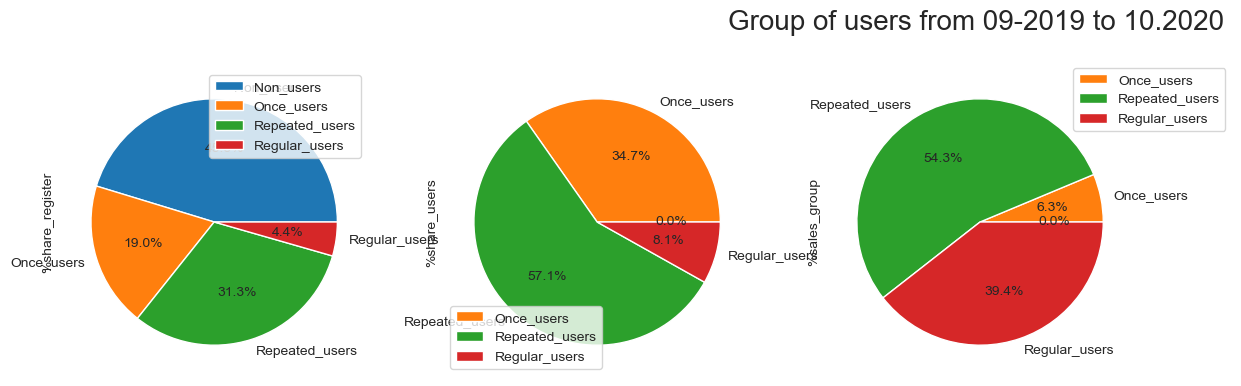

In [41]:
usergroup.iloc[:,4:7].plot.pie(fontsize=10, labels = usergroup.USER_GROUP, autopct='%1.1f%%',subplots=True, figsize=(14, 4))
plt.title('Group of users from 09-2019 to 10.2020 \n', fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=9, borderaxespad=0.)
plt.show()


<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Graph 02: Group of users by nationality/country:</b><br> 
</div>

In [42]:
### 
number_countries = data['REGISTRATION_COUNTRY'].nunique()
country_group = data.groupby(['REGISTRATION_COUNTRY'])[['registers', 'users', 'TOTAL_PURCHASES_EUR']].sum().reset_index()
country_group = country_group.sort_values(by='registers', ascending=False)
country_group.index = np.arange(number_countries)

### We calculate the proportion of user from one specific country
country_group['%register_country'] = country_group['registers']/ total_registers
country_group['%user_country'] = country_group['users']/ total_users
country_group['%sales_group'] = country_group['TOTAL_PURCHASES_EUR']/ total_sales
country_group.head()

REGISTRATION_COUNTRY  registers  users  TOTAL_PURCHASES_EUR  \
0                  FIN      10277   5451           933584.168   
1                  DNK       8081   4985          1028537.092   
2                  GRC       3042   1532           150036.084   
3                  USA         70      0                0.000   
4                  GBR         54      2              302.588   

   %register_country  %user_country  %sales_group  
0              0.467          0.453         0.440  
1              0.368          0.414         0.485  
2              0.138          0.127         0.071  
3              0.003          0.000         0.000  
4              0.002          0.000         0.000

In [43]:
country_group.iloc[3,0] = 'Other Countries'
for i in range(1,7,1): 
    country_group.iloc[3,i] = country_group.iloc[3:,i].sum()

country_group = country_group.head(4).copy()
country_group

REGISTRATION_COUNTRY  registers  users  TOTAL_PURCHASES_EUR  \
0                  FIN      10277   5451           933584.168   
1                  DNK       8081   4985          1028537.092   
2                  GRC       3042   1532           150036.084   
3      Other Countries        583     60             7301.580   

   %register_country  %user_country  %sales_group  
0              0.467          0.453         0.440  
1              0.368          0.414         0.485  
2              0.138          0.127         0.071  
3              0.027          0.005         0.003

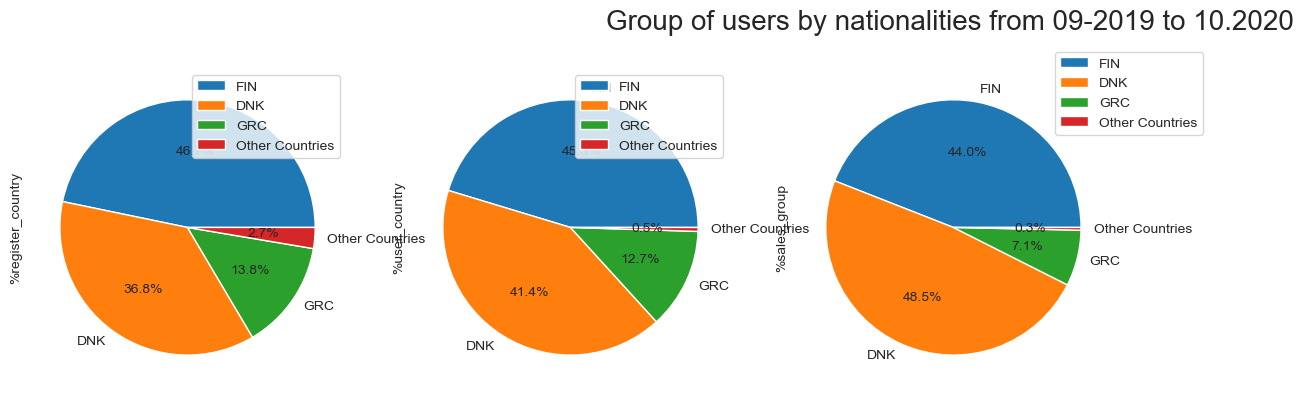

In [53]:

# Create the pie charts - over different countries
country_group.iloc[:,4:7].plot.pie(fontsize=10,labels = country_group.REGISTRATION_COUNTRY, autopct='%1.1f%%',subplots=True, figsize=(14, 5))

plt.legend(bbox_to_anchor=(1.05, 1.05), loc=9, borderaxespad=0.)
plt.title('Group of users by nationalities from 09-2019 to 10.2020 \n', fontsize = 20)
plt.show()

> ### NOTE: 
Out of the top three countries (FIN-DNK-GRC), the registers from the other contries have the sales figures as well as number of customers are both low, insignificantly contributed to the total sales of Wolt.


<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Graph 03: Group of users by Device usage:</b><br> 
</div>

In [254]:
data['PREFERRED_DEVICE'].value_counts()

ios        9747
android    8448
web        3715
Name: PREFERRED_DEVICE, dtype: int64

In [56]:
### 
device_group = data.groupby(['PREFERRED_DEVICE'])[['registers', 'users', 'TOTAL_PURCHASES_EUR']].sum().reset_index()
device_group = device_group.sort_values(by='registers', ascending=False)
#device_group.index = np.arange(3)

### We calculate the proportion of user from one specific country
device_group['%register_device'] = device_group['registers']/ total_registers
device_group['%user_device'] = device_group['users']/ total_users
device_group['%sales_group'] = device_group['TOTAL_PURCHASES_EUR']/ total_sales
device_group.head()

PREFERRED_DEVICE  registers  users  TOTAL_PURCHASES_EUR  %register_device  \
1              ios       9747   5328           932438.584             0.443   
0          android       8448   4108           646563.764             0.384   
2              web       3715   2591           540433.300             0.169   

   %user_device  %sales_group  
1         0.443         0.440  
0         0.342         0.305  
2         0.215         0.255

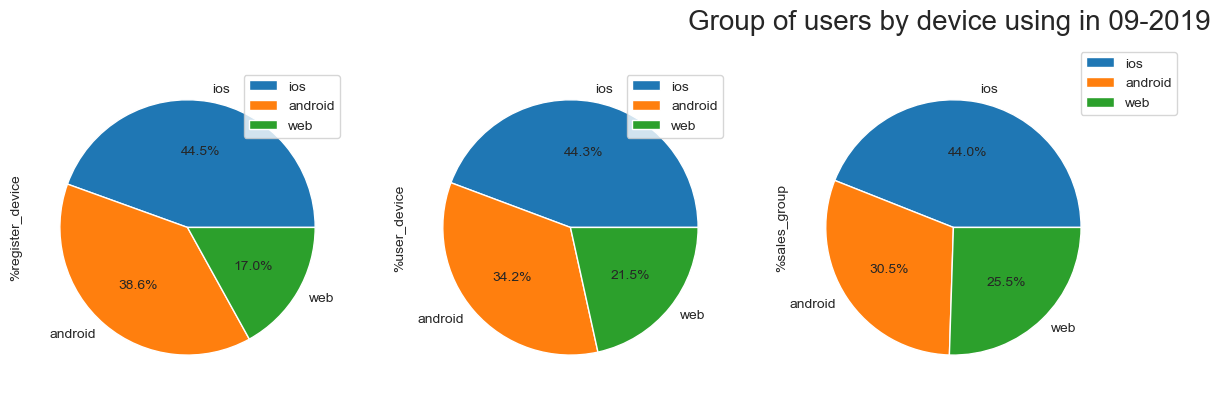

In [55]:

# Create the pie charts - over different countries
device_group.iloc[:,4:7].plot.pie(fontsize=10,labels = device_group.PREFERRED_DEVICE, autopct='%1.1f%%',subplots=True, figsize=(14, 5))

plt.legend(bbox_to_anchor=(1.05, 1.05), loc=9, borderaxespad=0.)
plt.title('Group of users by device using in 09-2019 \n', fontsize = 20)
plt.show()

> ### NOTE: 
The customers from Web are likely to use Wolt services and to order more than the one using Android device, while users with iOS have stably affect to the number of users & total sales.


<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Graph 04: Number of registers / users over time:</b><br> 
</div>

In [57]:
### 
registers = data.groupby(['REGISTRATION_DATE'])['USER_ID'].count().reset_index()
registers.rename(columns = {'USER_ID' : 'registers'}, inplace = True)

## Calculate the users who have registered & immediately used the service
users = data[(data.PURCHASE_COUNT > 0) & (data['REGISTRATION_DATE'] == data['FIRST_PURCHASE_DAY'])].groupby(['REGISTRATION_DATE'])['USER_ID'].count().reset_index()
users.rename(columns = {'USER_ID' : 'immediate_users'}, inplace = True)

group_registers = pd.merge(registers, users, on='REGISTRATION_DATE', how='left')
group_registers['%group_users'] = group_registers['immediate_users'] / group_registers['registers']
###
group_registers = str_to_date(group_registers, col = 'REGISTRATION_DATE' )

print(f"Avg percentage of registers immediately using the Wolt services: {group_registers['%group_users'].mean():0.2f}%. ")
group_registers.head()

REGISTRATION_DATE  registers  immediate_users  %group_users  Year  Month  \
0        2019-09-01        828              250         0.302  2019      9   
1        2019-09-02        516              129         0.250  2019      9   
2        2019-09-03        460              108         0.235  2019      9   
3        2019-09-04        553              162         0.293  2019      9   
4        2019-09-05        766              222         0.290  2019      9   

   Day Year_month  Week_day  
0    1    2019-09         6  
1    2    2019-09         0  
2    3    2019-09         1  
3    4    2019-09         2  
4    5    2019-09         3

In [61]:
print(f"Avg percentage of registers immediately using the Wolt services: {group_registers['%group_users'].mean():0.2f}%. ")
group_registers.head(10)

Avg percentage of registers immediately using the Wolt services: 0.26%. 


REGISTRATION_DATE  registers  immediate_users  %group_users  Year  Month  \
0        2019-09-01        828              250         0.302  2019      9   
1        2019-09-02        516              129         0.250  2019      9   
2        2019-09-03        460              108         0.235  2019      9   
3        2019-09-04        553              162         0.293  2019      9   
4        2019-09-05        766              222         0.290  2019      9   
5        2019-09-06        952              282         0.296  2019      9   
6        2019-09-07       1229              308         0.251  2019      9   
7        2019-09-08        924              267         0.289  2019      9   
8        2019-09-09        545               99         0.182  2019      9   
9        2019-09-10        522              110         0.211  2019      9   

   Day Year_month  Week_day  
0    1    2019-09         6  
1    2    2019-09         0  
2    3    2019-09         1  
3    4    2019-09         2  
4    5    2019-09         3  
5    6    2019-09         4  
6    7    2019-09         5  
7    8    2019-09         6  
8    9    2019-09         0  
9   10    2019-09         1

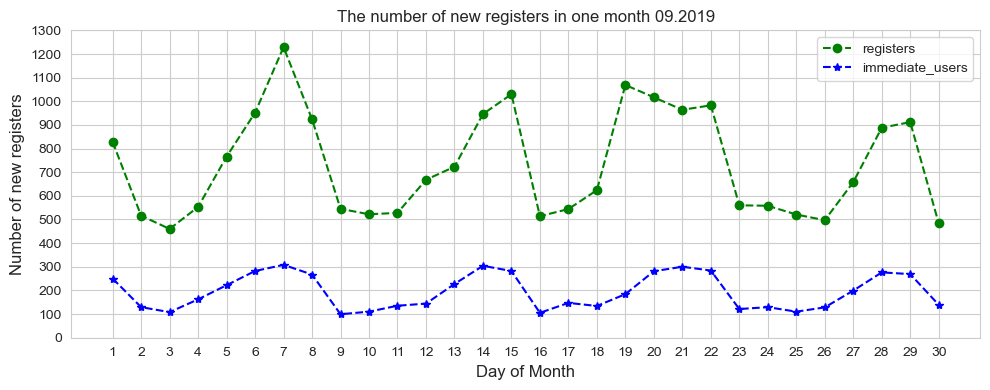

In [65]:
### Visualize the number of new registers & immediate users in one month 09.2019:
plt.figure(figsize=(10,4))
""" 
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(group_registers['Day'], group_registers['registers'], 'g-')
ax1.plot(group_registers['Day'], group_registers['immediate_users'], 'b-')
ax2.plot(group_registers['Day'], group_registers['%group_users'], 'r-')
ax1.set_xlabel('Day of Month', fontsize = 12)  """

group_registers['registers'].plot(marker='o',title='The number of new registers in one month 09.2019',color = 'green', style='--')
group_registers['immediate_users'].plot(marker='*',color = 'blue', style='--')
plt.xlabel('Day of Month', fontsize = 12)
plt.ylabel('Number of new registers', fontsize = 12)
plt.xticks(range(0,30,1), ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30'])
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300], ['0','100','200','300','400','500','600','700','800','900','1000','1100','1200','1300'])
plt.legend()
plt.tight_layout()

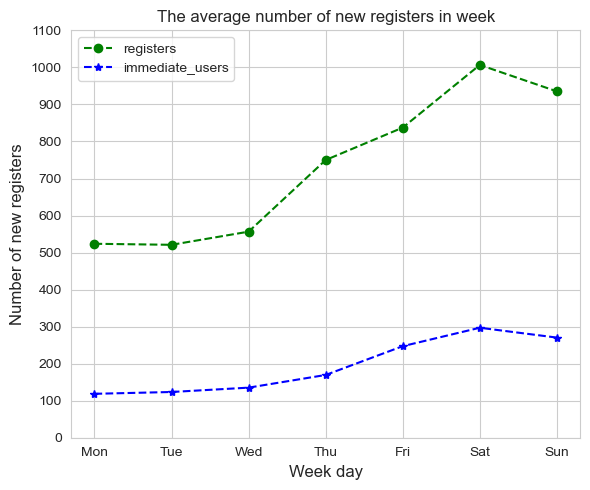

In [66]:
group_weekday = group_registers.groupby(['Week_day'])[['immediate_users', 'registers', '%group_users']].mean().reset_index()
maps = dict(zip(range(0,7), "Mon Tue Wed Thu Fri Sat Sun".split()))
group_weekday['Week_day'] = group_weekday['Week_day'].map(maps)

### Visualize the number of new registers in one month 09.2019:
plt.figure(figsize=(6,5))
group_weekday['registers'].plot(marker='o',title='The average number of new registers in week',color = 'green', style='--')
group_weekday['immediate_users'].plot(marker='*',color = 'blue', style='--')

plt.xlabel('Week day', fontsize = 12)
plt.ylabel('Number of new registers', fontsize = 12)
plt.xticks(range(0,7,1), "Mon Tue Wed Thu Fri Sat Sun".split())
#plt.yticks([400,500,600,700,800,900,1000,1100], ['400','500','600','700','800','900','1000','1100'])
plt.yticks([0,100,200,300,400,500,600,700,800,900,1000,1100], ['0','100','200','300','400','500','600','700','800','900','1000','1100'])
plt.legend()
plt.tight_layout()

In [67]:
group_weekday

Week_day  immediate_users  registers  %group_users
0      Mon          118.600    523.800         0.228
1      Tue          123.500    521.000         0.237
2      Wed          135.250    556.500         0.244
3      Thu          169.500    750.000         0.234
4      Fri          247.250    837.500         0.297
5      Sat          297.000   1006.750         0.298
6      Sun          270.400    935.400         0.290

> ### NOTE: 
The rate of registers comed to make the purchase is higher clearly in weekends (Fri-Sat-Sun) - 29% compared to 23%

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Graphs 05: Number of orders over time by First_purchase_day & Last_purchase_day :</b><br> 

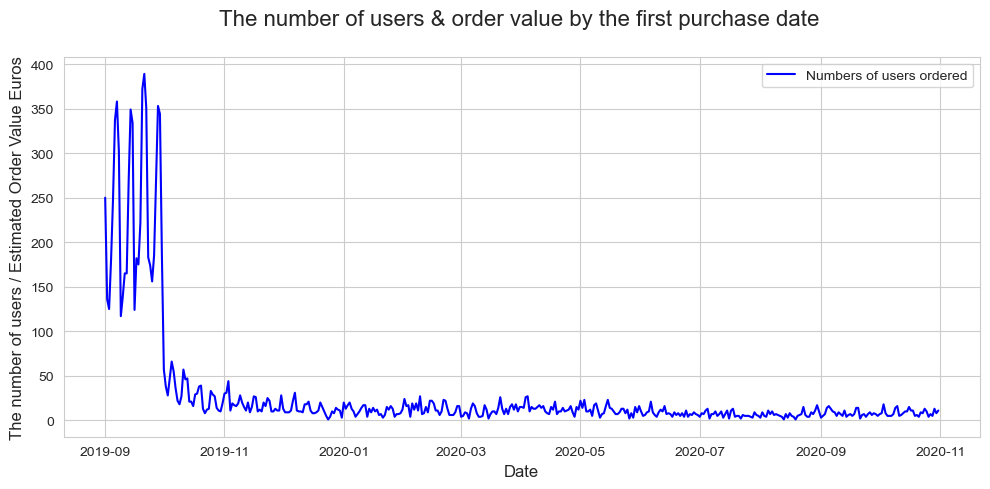

In [89]:
### We plot a graph to see the fisrt PO made in which day from 09.2019 to 10.2020, 
# we make assumptions with the value of PO based on AVG_PURCHASE_VALUE to see the total order value & number of orders by the firstPO
PO_per_date = data.groupby(['FIRST_PURCHASE_DAY'])[['users', 'AVG_PURCHASE_VALUE_EUR']].sum().reset_index()
PO_per_date = str_to_date(PO_per_date, col = 'FIRST_PURCHASE_DAY' )
#PO_per_date.head()

### Visualize the number of new registers in one month 09.2019:
plt.figure(figsize=(10,5))
plt.plot(PO_per_date.FIRST_PURCHASE_DAY, PO_per_date.users , color = 'blue', label='Numbers of users ordered')  # oil['price_oil'].plot()
#plt.plot(PO_per_date.FIRST_PURCHASE_DAY, PO_per_date.AVG_PURCHASE_VALUE_EUR , color = 'green', label="Order Value")

#sns.barplot(data=user_per_date, y='USERS', x='Day', color = 'blue')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('The number of users / Estimated Order Value Euros', fontsize = 12)
plt.title('The number of users & order value by the first purchase date \n', fontsize = 16)
#plt.xticks(range(0,30,1), ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30'])
#plt.yticks([400,500,600,700,800,900,1000,1100,1200,1300], ['400','500','600','700','800','900','1000','1100','1200','1300'])
plt.legend()
plt.tight_layout()

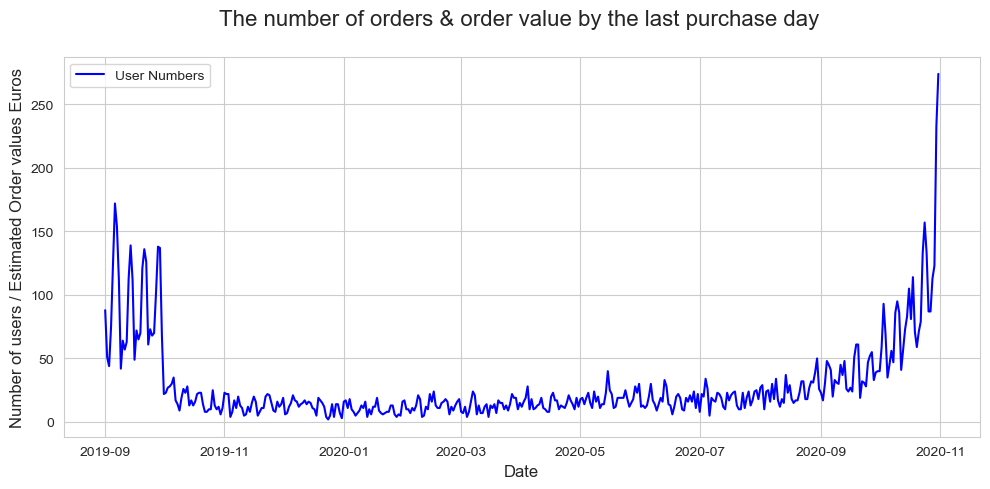

In [96]:
### We plot a graph to see the last PO made in which day from 09.2019 to 10.2020, 
last_PO_per_date = data.groupby(['LAST_PURCHASE_DAY'])[['users', 'AVG_PURCHASE_VALUE_EUR']].sum().reset_index()
last_PO_per_date = str_to_date(last_PO_per_date, col = 'LAST_PURCHASE_DAY' )
last_PO_per_date

### Visualize the number of new registers in one month 09.2019:
# we make assumptions with the value of PO based on AVG_PURCHASE_VALUE to see the total order value & number of orders by the firstPO

plt.figure(figsize=(10,5))
plt.plot(last_PO_per_date.LAST_PURCHASE_DAY, last_PO_per_date.users , color = 'blue', label='User Numbers')  # oil['price_oil'].plot()
#plt.plot(last_PO_per_date.LAST_PURCHASE_DAY, last_PO_per_date.AVG_PURCHASE_VALUE_EUR , color = 'green', label="Order Value")

#sns.barplot(data=user_per_date, y='USERS', x='Day', color = 'blue')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Number of users / Estimated Order values Euros', fontsize = 12)
plt.title('The number of orders & order value by the last purchase day \n', fontsize = 16)
#plt.xticks(range(0,30,1), ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30'])
plt.legend()
#plt.yticks([0, 1000,2000,3000,4000,5000,6000,7000,8000,9000], ['0','1000','2000','3000','4000','5000','6000','7000','8000','9000'])
plt.tight_layout()

> ### NOTE: 
+ The number of users processed the orders in 09.2019 as the first & last purchase day are extremely high, then drop sharply from begining of 10.2019
+ The number of users made the last orders has been much low over 1 year from 09.2019 to 09.2020, then increased quickly and bounced multi-times in the last 10.2020.

<a id = "4"></a>
 
## <h2 align="center"><font color='#1975D2'>  <b> 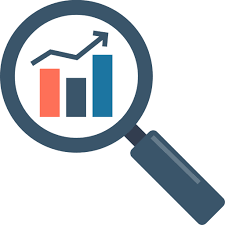📊 DATA PREPROCESSING </font></h2></b><br>


In [97]:
### With the PURCHASE_COUNT=0, we have null values in FIRST_PURCHASE_DAY & LAST_PURCHASE_DAY
print("The number of rows with null values in days purchasing and no PURCHASE: ", 
      data[((data.PURCHASE_COUNT == 0 ) & data.FIRST_PURCHASE_DAY.isnull() & data.LAST_PURCHASE_DAY.isnull())]['USER_ID'].count(), " rows.")

print("The number of rows when column LAST_PURCHASE_DAY is null: ", data[data.LAST_PURCHASE_DAY.isnull()]['USER_ID'].count(), " rows.")

print("The number of rows when column FIRST_PURCHASE_DAY is null with ONCE TIME users: ", 
      data[(data.PURCHASE_COUNT == 1 ) & (data.FIRST_PURCHASE_DAY.isnull())]['USER_ID'].count(), " rows.")

print("The number of rows when column FIRST_PURCHASE_DAY is null with REPEATED users: ", 
      data[(data.PURCHASE_COUNT > 1 ) & (data.FIRST_PURCHASE_DAY.isnull())]['USER_ID'].count(), " rows.")

The number of rows with null values in days purchasing and no PURCHASE:  9955  rows.
The number of rows when column LAST_PURCHASE_DAY is null:  9956  rows.
The number of rows when column FIRST_PURCHASE_DAY is null with ONCE TIME users:  29  rows.
The number of rows when column FIRST_PURCHASE_DAY is null with REPEATED users:  35  rows.


In [98]:
### Deal with the null values in the Column - First_purchase_date when purchase_count = 1 (dealing with 28 rows)
data.loc[( (data.PURCHASE_COUNT == 1) & (data.LAST_PURCHASE_DAY.isnull()) ), 'LAST_PURCHASE_DAY' ] = data['REGISTRATION_DATE'] 
data.loc[((data.PURCHASE_COUNT == 1) & (data.FIRST_PURCHASE_DAY.isnull()) & (data.LAST_PURCHASE_DAY.notnull())), 'FIRST_PURCHASE_DAY' ] = data['LAST_PURCHASE_DAY'] 

### Deal with the null values in the Column - First_purchase_date when purchase_count = 0
data.loc[((data.PURCHASE_COUNT > 1) & data.FIRST_PURCHASE_DAY.isnull() ), 'FIRST_PURCHASE_DAY' ] = data['REGISTRATION_DATE'] 

<h3 align="left"><font color='#006600'> 📌 <b> Divide data file into 02 groups: Registers & Customers</font></h3></b><br>
    
>**Registers:** just registered in 09.2019 but never using Wolt services - PURCHASE_COUNT=0

>**Customers:** registered and used Wolt services at least once time - PURCHASE_COUNT>0

In [99]:
### Divide data into 02 groups for further analysis:
non_users = data[data.PURCHASE_COUNT == 0] ## This file with 9955 registers
customers = data[data.PURCHASE_COUNT > 0]  ## this file with 12,028 registers as Customers

In [106]:
non_users['REGISTRATION_COUNTRY'].value_counts(1).head(3) ## Other countries: 5.2% - 

FIN   0.485
DNK   0.311
GRC   0.152
Name: REGISTRATION_COUNTRY, dtype: float64

In [122]:
customers['REGISTRATION_COUNTRY'].value_counts(1).head(3) ## Other countries: 0.6% - 

FIN   0.453
DNK   0.414
GRC   0.127
Name: REGISTRATION_COUNTRY, dtype: float64

In [105]:
non_users['PREFERRED_DEVICE'].value_counts(1).head(3)

ios       0.447
android   0.439
web       0.114
Name: PREFERRED_DEVICE, dtype: float64

In [123]:
customers['PREFERRED_DEVICE'].value_counts(1).head(3)

ios       0.443
android   0.342
web       0.215
Name: PREFERRED_DEVICE, dtype: float64

In [118]:
print(f"The rate of registers with valid payment methods: {non_users['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(1)[1]*100:0.1f} %")
print(f"The rate of users with valid payment methods: {customers['USER_HAS_VALID_PAYMENT_METHOD'].value_counts(1)[1]*100:0.1f} %")

The rate of registers with valid payment methods: 4.5 %
The rate of users with valid payment methods: 59.2 %


**CUSTOMERS tables**

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Create new columns: Calculate the number of days from registering to purchasing:</b><br> 
</div>

In [109]:
###
customers = return_date(customers, col = 'REGISTRATION_DATE')
customers = return_date(customers, col = 'FIRST_PURCHASE_DAY')
customers = return_date(customers, col = 'LAST_PURCHASE_DAY')

### Number of days from registering to purchasing
customers['Golden_Time'] = customers['FIRST_PURCHASE_DAY'] - customers['REGISTRATION_DATE']
customers['Golden_Time'] = customers['Golden_Time'].apply(lambda x: x.days) # This is data['days_start_PO'][0] with data type - Timedelta('0 days 00:00:00')

## Since the last date in the data was 31.10.2020, we use the next date to calculate the recency of one order
customers['days_last_PO'] = dt.date(2020,11,1) -  customers['LAST_PURCHASE_DAY'] 
customers['days_last_PO'] = customers['days_last_PO'].apply(lambda x: x.days)

customers['First_Last_PO'] = customers['LAST_PURCHASE_DAY'] - customers['FIRST_PURCHASE_DAY']
customers['First_Last_PO'] = customers['First_Last_PO'].apply(lambda x: x.days)

In [110]:
customers.describe().T

count      mean      std   min  \
PURCHASE_COUNT                          12028.000     6.114   10.763 1.000   
PURCHASE_COUNT_DELIVERY                 12028.000     5.742   10.536 0.000   
PURCHASE_COUNT_TAKEAWAY                 12028.000     0.372    1.416 0.000   
USER_ID                                 12028.000 11036.134 6383.388 2.000   
BREAKFAST_PURCHASES                     12028.000     0.194    1.104 0.000   
LUNCH_PURCHASES                         12028.000     2.375    5.626 0.000   
EVENING_PURCHASES                       12028.000     0.493    1.828 0.000   
DINNER_PURCHASES                        12028.000     3.029    5.238 0.000   
TOTAL_PURCHASES_EUR                     12028.000   176.210  299.087 1.012   
DISTINCT_PURCHASE_VENUE_COUNT           12028.000     3.320    3.766 1.000   
MIN_PURCHASE_VALUE_EUR                  12028.000    24.428   18.915 0.000   
MAX_PURCHASE_VALUE_EUR                  12028.000    42.068   41.176 1.016   
AVG_PURCHASE_VALUE_EUR                  12028.000    31.195   20.717 1.012   
IOS_PURCHASES                           12028.000     2.900    7.456 0.000   
WEB_PURCHASES                           12028.000     1.057    4.776 0.000   
ANDROID_PURCHASES                       12028.000     2.157    6.876 0.000   
USER_HAS_VALID_PAYMENT_METHOD           12028.000     0.592    0.492 0.000   
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE 12028.000    11.502    6.931 0.000   
MOST_COMMON_WEEKDAY_TO_PURCHASE         12028.000     4.010    2.010 1.000   
AVG_DAYS_BETWEEN_PURCHASES               7832.000    64.294   72.570 0.000   
AVERAGE_DELIVERY_DISTANCE_KMS           12028.000     5.961    3.466 0.002   
registers                               12028.000     1.000    0.000 1.000   
users                                   12028.000     1.000    0.000 1.000   
Golden_Time                             12028.000    68.297  111.206 0.000   
days_last_PO                            12028.000   196.054  160.548 1.000   
First_Last_PO                           12028.000   148.131  155.527 0.000   

                                             25%       50%       75%       max  
PURCHASE_COUNT                             1.000     3.000     6.000   320.000  
PURCHASE_COUNT_DELIVERY                    1.000     2.000     6.000   320.000  
PURCHASE_COUNT_TAKEAWAY                    0.000     0.000     0.000    44.000  
USER_ID                                 5529.750 11038.000 16520.250 21983.000  
BREAKFAST_PURCHASES                        0.000     0.000     0.000    52.000  
LUNCH_PURCHASES                            0.000     1.000     2.000   171.000  
EVENING_PURCHASES                          0.000     0.000     0.000    71.000  
DINNER_PURCHASES                           0.000     1.000     3.000   104.000  
TOTAL_PURCHASES_EUR                       32.384    75.900   196.328  7979.620  
DISTINCT_PURCHASE_VENUE_COUNT              1.000     2.000     4.000    71.000  
MIN_PURCHASE_VALUE_EUR                    14.196    19.266    29.406   659.100  
MAX_PURCHASE_VALUE_EUR                    23.368    35.560    51.816  3048.000  
AVG_PURCHASE_VALUE_EUR                    19.228    27.324    38.456   657.800  
IOS_PURCHASES                              0.000     0.000     2.000   200.000  
WEB_PURCHASES                              0.000     0.000     1.000   196.000  
ANDROID_PURCHASES                          0.000     0.000     1.000   221.000  
USER_HAS_VALID_PAYMENT_METHOD              0.000     1.000     1.000     1.000  
MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE    5.000    11.500    18.000    23.000  
MOST_COMMON_WEEKDAY_TO_PURCHASE            2.000     4.000     6.000     7.000  
AVG_DAYS_BETWEEN_PURCHASES                18.000    39.500    81.000   421.000  
AVERAGE_DELIVERY_DISTANCE_KMS              2.950     5.928     8.978    11.999  
registers                                  1.000     1.000     1.000     1.000  
users                                      1.000     1.000     1.000     1

<a id = "5"></a>
### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#1975D2; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1975D2"> 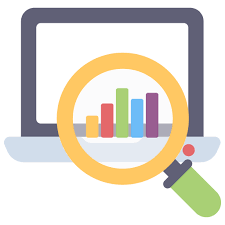 PART 2 - Customer Segmentation</p></div>

## <h2 align="center"><font color='#1975D2'>  <b> ※ CALCULATION : RFM METRICS </font></h2></b><br>
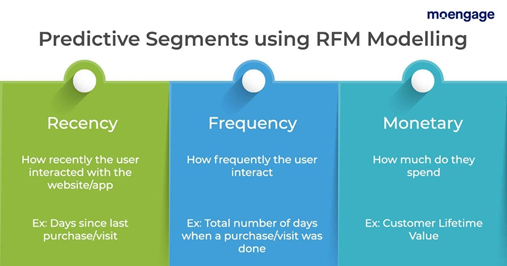

### What is the RFM Segmentation Model?

    + RFM segmentation is a data-driven tool which helps us get to know our customers. It’s based on the principle that we can groups our customers based on their spending behavior in the past or transaction history – how recently, how often they bought, and how much they spent.
    
    + The RFM analysis model is provenly efficient for behaviour-based customer segmentation since it enables to segments customers into various clusters.

    + Applying Pareto Principle to RFM, the model is linked with the famous Pareto Principle, which means that 80% of the total sales likely come from the top 20% of customers. Obviously, regular customers will always be high contributors to business monetary value, and hence that customer segmentation is highly critical for business performance.


Applying RFM score formula
Therefore, the range for each score has been pre-defined. Range thresholds are based on the nature of the business. You would then define ranges for frequency and monetary values in the same way.
This scoring method depends on the individual businesses – since they decide what ranges they consider relevant and appropriate.
There are limitations with this option, as the business grows score ranges may need frequent adjustments. 

The standard Customer Segments with 11 personas using RFM Modelling
Think about what percentage of your existing customers would be in each of these segments. And evaluate how effective the recommended marketing action can be for your business.

Each customer is placed into their corresponding segment based on their scores. Frequency and Monetary value are combined to reduce the possible options from 125 to 50. It is logical to combine these as they both relate to how much the customer is buying. 
Recency is more about the customer re-engagement levels.


This RFM segmentation will readily answer key questions for your business:

·       Who are my best customers?
·       Who are your loyal customers?
·       Who has the potential to be converted in more profitable customers?

·       Which group of customers is most likely to respond to your current campaign?
·       Which customers must you retain?

·       Which customers are at the verge of churning?
·       Who can you view as lost customers?

Acquire High-value Customers - CLV analysis on all your current customers - produce the highest-value customers
Secure Future VIPs - VIP profile with characteristics - use predictive analytics to get a strong idea of future VIPs,

Practice Value-tier Segmentation - to identify different segmented customers based on different value tiers - focus on converting loyal customers from their current tier to a higher one.

Prevent Churn - with the average order value and purchase frequency of customer base, it's possible to craft personalized messaging and send the right offer to the right person at the right time.



<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
   <a class="alert alert-block alert-success" style="font-size:18px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Approach to RFM Analysis</b><br>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    STEP 1 - PREPARE & CHECK DATA DISTRIBUTION- <span class="badge badge-primary badge-pill">3.1</span></a> 
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    STEP 2 - CALCULATE & ASSIGN SCORES TO GET RFM SEGMENTS- <span class="badge badge-primary badge-pill">3.2</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    STEP 3 LABELLING RFM SEGMENTS <span class="badge badge-primary badge-pill">3.3</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    COMBINE WITH DEMOGRAPHIC DATA TO EXPLORE EACH SEGMENT<span class="badge badge-pill">3.4</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#10" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    CUSTOMER SEGMENTS WITH EDA - <span class="badge badge-success badge-pill">3.5</span></a>

</div>
</div>

<a id = "6"></a>
## <h2 align="center"><font color='#1975D2'>  <b> ※ STEP 1 - PREPARE & CHECK DATA DISTRIBUTION</font></h2></b><br></div>

In [132]:
RFM = customers[['USER_ID','days_last_PO', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR', 'AVG_PURCHASE_VALUE_EUR']] #: lambda x: (today_date - x.max()).days
RFM.columns = ['user_id','recency', 'frequency', 'total_order', 'avg_order']

RFM = RFM.reset_index()
RFM = RFM.drop(columns = ["index"], axis = 1)
RFM.head()

user_id  recency  frequency  total_order  avg_order
0        2       60          1       38.456     38.456
1        3      160         19      631.488     33.396
2        8       18          1       19.228     19.228
3       13        5         19      587.972     31.372
4       14       53          2      118.404     59.708

In [38]:
RFM.describe().T

count      mean      std   min      25%       50%       75%  \
user_id     12028.000 11036.134 6383.388 2.000 5529.750 11038.000 16520.250   
recency     12028.000   196.054  160.548 1.000   35.000   163.000   387.000   
frequency   12028.000     6.114   10.763 1.000    1.000     3.000     6.000   
total_order 12028.000   176.210  299.087 1.012   32.384    75.900   196.328   
avg_order   12028.000    31.195   20.717 1.012   19.228    27.324    38.456   

                  max  
user_id     21983.000  
recency       427.000  
frequency     320.000  
total_order  7979.620  
avg_order     657.800

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌📌📌 &nbsp;<b>Check some outlier values for better analysis:</b><br> 
</div>

In [147]:
print(f"Number of customers with the purchase orders over 38 times - (mean+3std) as mentioned previously:  ")
wolt_summary[wolt_summary.USER_GROUP > 38][['users','TOTAL_PURCHASES_EUR','%share_register','%share_users','%sales_group']].sum()

Number of customers with the purchase orders over 38 times - (mean+3std) as mentioned previously:  


users                    203.000
TOTAL_PURCHASES_EUR   299375.912
%share_register            0.009
%share_users               0.017
%sales_group               0.141
dtype: float64

In [146]:
### From the describe of RFM table, we noted that, there might have outliers or miss-typing values in the data
RFM[RFM.avg_order < 5]['user_id'].count()
## We also can observe a group of customers who are likely sensitive to price - they have the avg_order < 5euro

19

In [141]:
RFM[RFM.avg_order > 100]['user_id'].count()

120

In [133]:
### We plot the histogram of the recency of customers
fig = px.histogram(RFM, x='recency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Visit Recency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [135]:

fig = px.histogram(RFM[RFM.frequency < 39], x='frequency', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Frequency Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [149]:
fig = px.histogram(RFM[RFM.total_order < 1500], x='total_order', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [150]:
fig = px.histogram(RFM[RFM.avg_order < 100], x='avg_order', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Monetary Distribution of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

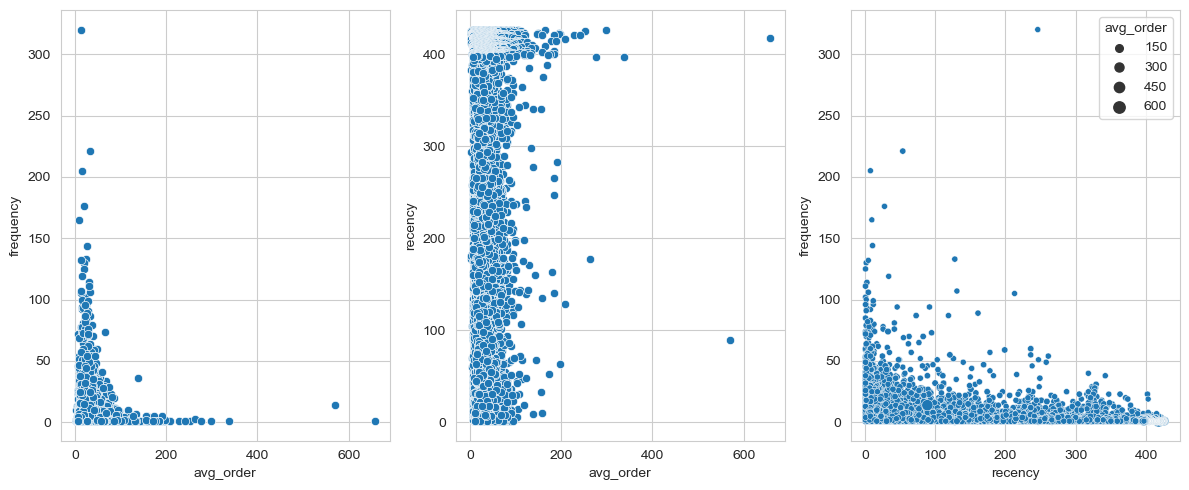

In [173]:
fig, axes = plt.subplots(1, 3, figsize = (12, 5))
axes = axes.flatten()
sns.scatterplot(x = 'avg_order', y = 'frequency', data = RFM, ax = axes[0])
sns.scatterplot(x = 'avg_order', y = 'recency', data = RFM, ax = axes[1])
sns.scatterplot(x = 'recency', y = 'frequency', data = RFM, ax = axes[2], size = 'avg_order') #,palette = "Set1")
plt.tight_layout()

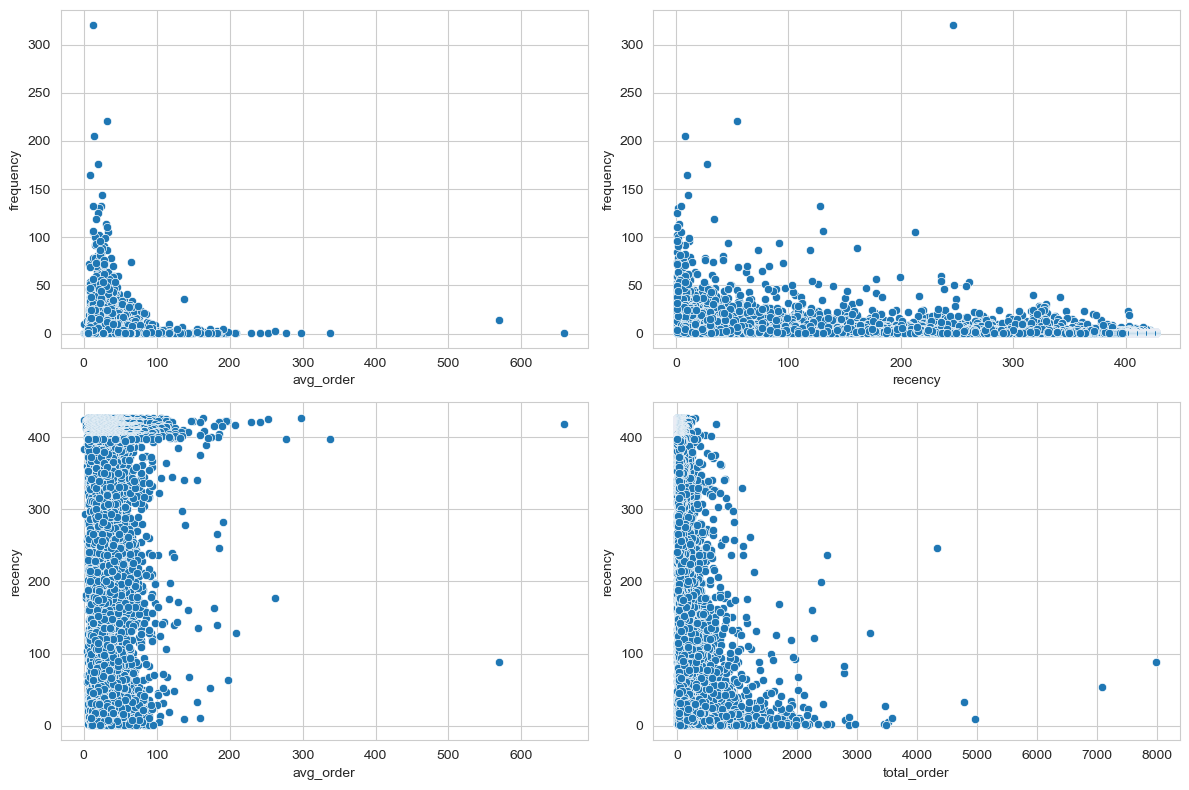

In [179]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
axes = axes.flatten()
sns.scatterplot(x = 'avg_order', y = 'frequency', data = RFM, ax = axes[0])
sns.scatterplot(x = 'recency', y = 'frequency', data = RFM, ax = axes[1])
sns.scatterplot(x = 'avg_order', y = 'recency', data = RFM, ax = axes[2])
sns.scatterplot(x = 'total_order', y = 'recency', data = RFM, ax = axes[3])
plt.tight_layout()

In [180]:
RFM.describe().T

count      mean      std   min      25%       50%       75%  \
user_id     12028.000 11036.134 6383.388 2.000 5529.750 11038.000 16520.250   
recency     12028.000   196.054  160.548 1.000   35.000   163.000   387.000   
frequency   12028.000     6.114   10.763 1.000    1.000     3.000     6.000   
total_order 12028.000   176.210  299.087 1.012   32.384    75.900   196.328   
avg_order   12028.000    31.195   20.717 1.012   19.228    27.324    38.456   

                  max  
user_id     21983.000  
recency       427.000  
frequency     320.000  
total_order  7979.620  
avg_order     657.800

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Some remarks from the graphs & self-experiments are listed hereby for further analysis:</b><br> 

* <i> 1. The Wolt delivery service-users in Finland are likely less sensitive to monetary issue due to the high price range of food dishes ordered from restaurants (appx. 12euro/dish plus delivery fee ~ 15e/time - in 2020</i><br>
* <i> 2. Based on the nature of Wolt business model, in one side, the bigger orders will return on larger margins for Wolt, but on the another side the more frequecies of small repeated orders by regular customers will longer maintain the business.</i><br>
* <i> 3. The nature of business will likely define the frequency level as well as the monetary range of one order through WOLT.</i><br>
* <u> 4. From above notes, the business model of WOLT will weight more on F-Frequency & R-recency metrics with the type of single product offer - delivery service.</u><br>
    
</div>

<a id = "7"></a>
## <h2 align="center"><font color='#1975D2'>  <b> ※ STEP 2 - CALCULATE & ASSIGN SCORES TO GET RFM SEGMENTS </font></h1></b><br></div>

In [41]:
""" 
def set_rfm_scores(df):

    df['recency_score'] = pd.qcut(df["recency"], 8, labels=[8, 7, 6, 5, 4, 3, 2, 1]) # [1, 1, 2, 2, 3, 3, 4, 5])
    df.loc[(df.recency_score == 2),'recency_score'] = 1
    df.loc[((df.recency_score == 3) | (df.recency_score == 4)),'recency_score'] = 2
    df.loc[((df.recency_score == 5) | (df.recency_score == 6)),'recency_score'] = 3
    df.loc[(df.recency_score == 7),'recency_score'] = 4
    df.loc[(df.recency_score == 8),'recency_score'] = 5
    
    df["frequency_score"] = pd.qcut(df["frequency"].rank(method='first'), 8, labels=[1, 2, 3, 4, 5, 6, 7, 8])
    df.loc[(df.frequency_score == 2),'frequency_score'] = 1
    df.loc[((df.frequency_score == 3) | (df.frequency_score == 4)),'frequency_score'] = 2
    df.loc[((df.frequency_score == 5) | (df.frequency_score == 6)),'frequency_score'] = 3
    df.loc[(df.frequency_score == 7),'frequency_score'] = 4
    df.loc[(df.frequency_score == 8),'frequency_score'] = 5
    
    df["monetary_score"] = pd.qcut(df["avg_order"], 5, labels=[1, 2, 3, 4, 5])
    df["RFM_SCORE"] = df["recency_score"].astype(str) + df["frequency_score"].astype(str) + df["monetary_score"].astype(str)

    return df

set_rfm_scores(RFM)
RFM.head()
"""

user_id  recency  frequency  total_order  avg_order recency_score  \
0        2       60          1       38.456     38.456             3   
1        3      160         19      631.488     33.396             3   
2        8       18          1       19.228     19.228             4   
3       13        5         19      587.972     31.372             5   
4       14       53          2      118.404     59.708             3   

  frequency_score monetary_score RFM_SCORE  
0               1              4       314  
1               5              4       354  
2               1              2       412  
3               5              3       553  
4               2              5       325

In [182]:
def set_rfm_scores(df):

    #df['recency_score'] = pd.qcut(df["recency"], 8, labels=[8, 7, 6, 5, 4, 3, 2, 1]) # [1, 1, 2, 2, 3, 3, 4, 5])
    # 5: 2weeks, 4: 2ms, 3: 6ms, 2: 9ms, 1
    df["recency_score"] = df['recency'].apply(lambda x: 5 if x<15 else 4 if x < 61 else 3 if x < 181 else 2 if x < 271 else 1 )
    
    df["frequency_score"] = df['frequency'].apply(lambda x: 1 if x<3 else 2 if x < 7 else 3 if x < 13 else 4 if x < 18 else 5 )
    
    #df["monetary_score"] = df['avg_order'].apply(lambda x: 1 if x<10 else 2 if x < 20 else 3 if x < 32 else 4 if x < 45 else 5 )
    df["monetary_score"] = pd.qcut(df["avg_order"], 5, labels=[1, 2, 3, 4, 5])
    
    df["RFM_SCORE"] = df["recency_score"].astype(str) + df["frequency_score"].astype(str) + df["monetary_score"].astype(str)

    return df

set_rfm_scores(RFM)
RFM.head()

user_id  recency  frequency  total_order  avg_order  recency_score  \
0        2       60          1       38.456     38.456              4   
1        3      160         19      631.488     33.396              3   
2        8       18          1       19.228     19.228              4   
3       13        5         19      587.972     31.372              5   
4       14       53          2      118.404     59.708              4   

   frequency_score monetary_score RFM_SCORE  
0                1              4       414  
1                5              4       354  
2                1              2       412  
3                5              3       553  
4                1              5       415

In [183]:
#RFM[RFM.avg_order <3]
#RFM[RFM.recency_score == 5].value_counts()
#RFM[RFM.monetary_score == 1].value_counts()
#RFM[RFM.avg_order >300]
RFM[RFM.frequency_score == 2]['frequency'].value_counts()

3    1148
4     835
5     571
6     474
Name: frequency, dtype: int64

In [184]:
RFM[(RFM['RFM_SCORE'] == '544') ]['recency'].value_counts()
RFM[(RFM['RFM_SCORE'] == '544') ]['frequency'].value_counts()
#RFM[(RFM['RFM_SCORE'] == '545') ]['avg_order'].value_counts()

17    15
15    12
13    10
14     8
16     8
Name: frequency, dtype: int64

<a id = "8"></a>
## <h1 align="center"><font color='#1975D2'>  <b> ※ STEP 3 - LABELLING RFM SEGMENTS </font></h1></b><br></div>

In [207]:
segments_map = {
    r'[1][1-2][1-5]': 'G4_trial/lost', #111, 112, 211, 212

    r'[1][3-5][1-3]': 'G4_Hibernating',
    r'[2][1-2][3-5]': 'G4_Hibernating', #213,214,215,223,224,225
    
    r'[2][1-3][1-2]': 'G4_about_to_Sleep', 
    r'[3][1-2][1-3]': 'G4_about_to_Sleep', 
    
    r'[1][3-5][4-5]': 'G3_cant_Lose',
    r'[2][4-5][4-5]': 'G3_cant_Lose', # 245, 255, 244, 254 - Almost lose - toooo long from order 

    r'[2][4-5][1-3]': 'G3_at_Risk',
    r'[2][3][3-5]': 'G3_at_Risk', # 233,234,235
    
    r'[3][1-2][4-5]': 'G3_Need_attention',   
    r'[3][3-5][1-2]': 'G3_recent_customers', # 333,334 group of customer used to order frequently & high value
    r'[3][3-5][3-5]': 'G3_Need_attention',
    # medium value customers
    
    r'[4-5][1][4-5]': 'G2_return_customers', ## 41,42,51,52 - 1 group use once then return, 1 group register now use  
    r'[4-5][1-2][1-3]': 'G2_return_customers',   
    r'[4-5][3-5][1-2]': 'G2_promissing', 
    
    ## High value customers
    r'[4-5][2][4-5]': 'G1_potential_loyalists', 
    r'[4-5][3][3-5]': 'G1_potential_loyalists', 
    r'[4-5][4-5][3]': 'G1_loyal_customers', 
    r'[4-5][4][4-5]': 'G1_loyal_customers', 
    r'[4-5][5][4-5]': 'G1_champions'  
}

RFM['segment'] = RFM['RFM_SCORE'].replace(segments_map, regex = True)
RFM['count'] = 1 # Add this column in order to count the number of customers in each group
RFM.head()

user_id  recency  frequency  total_order  avg_order  recency_score  \
0        2       60          1       38.456     38.456              4   
1        3      160         19      631.488     33.396              3   
2        8       18          1       19.228     19.228              4   
3       13        5         19      587.972     31.372              5   
4       14       53          2      118.404     59.708              4   

   frequency_score monetary_score RFM_SCORE              segment  count  
0                1              4       414  G2_return_customers      1  
1                5              4       354    G3_Need_attention      1  
2                1              2       412  G2_return_customers      1  
3                5              3       553   G1_loyal_customers      1  
4                1              5       415  G2_return_customers      1

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Plot some graphs to observe the segment & sales proportion:</b><br> 

In [221]:
# We group the customers based on the segment name in order to assess the sales and its proportion in total sales
segment_summary = RFM.groupby(['segment'])['total_order', 'count'].sum().reset_index()
segment_summary['total_order'] = segment_summary['total_order'].apply(lambda x: round(x))
segment_summary['%sales_segment'] = (segment_summary['total_order'] / total_sales)

total_customers = segment_summary['count'].sum()
segment_summary['%customers_segment'] = (segment_summary['count'] / total_customers)

segment_summary.sort_values(by = 'segment', ascending=False)
### Here we have the summary of customers by segments
segment_summary

segment  total_order  count  %sales_segment  \
0             G1_champions       274616    227           0.130   
1       G1_loyal_customers       292056    431           0.138   
2   G1_potential_loyalists       303023   1103           0.143   
3            G2_promissing       335972    824           0.159   
4      G2_return_customers        97469   1375           0.046   
5        G3_Need_attention       279774   1089           0.132   
6               G3_at_Risk        38884     89           0.018   
7             G3_cant_Lose        26681     43           0.013   
8      G3_recent_customers        78468    250           0.037   
9           G4_Hibernating       101448    776           0.048   
10       G4_about_to_Sleep        86642   1503           0.041   
11           G4_trial/lost       204424   4318           0.096   

    %customers_segment  
0                0.019  
1                0.036  
2                0.092  
3                0.069  
4                0.114  
5                0.091  
6                0.007  
7                0.004  
8                0.021  
9                0.065  
10               0.125  
11               0.359

In [226]:
segment_summary['%sales_segment'].sum()

0.9999990922211427

<Figure size 600x400 with 0 Axes>

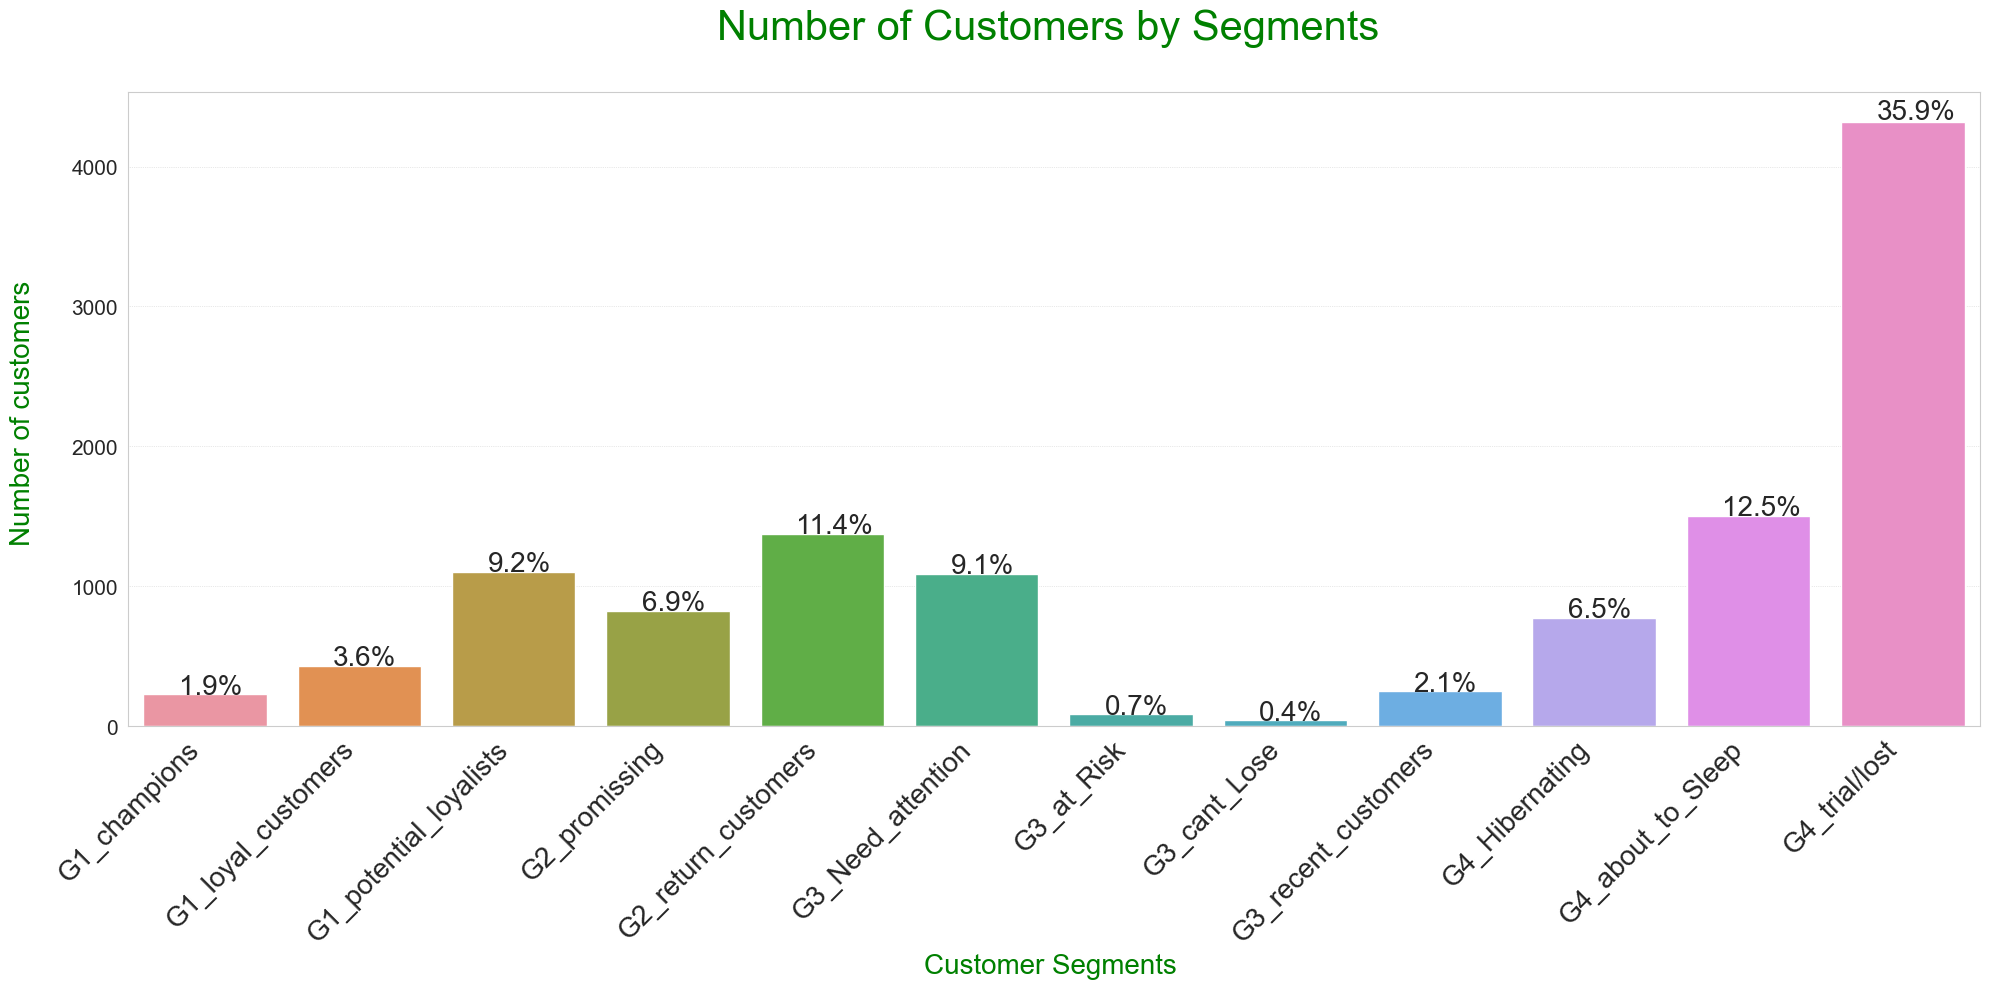

In [211]:
### Plot the customer segments based on number of customers to see their proportion into the total customers of Wolt
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(figsize=(20,10))

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)
bar_ap = sns.barplot(data = segment_summary, x = 'segment', y ='count')

total = total_customers
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 20)

bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=45, ha = 'right')
plt.title('Number of Customers by Segments \n', size = 30, color='green')
plt.ylabel('Number of customers \n', size = 20,color="green" )
plt.xlabel("Customer Segments ",fontsize = 20, color="green" )
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.tight_layout()

<Figure size 600x400 with 0 Axes>

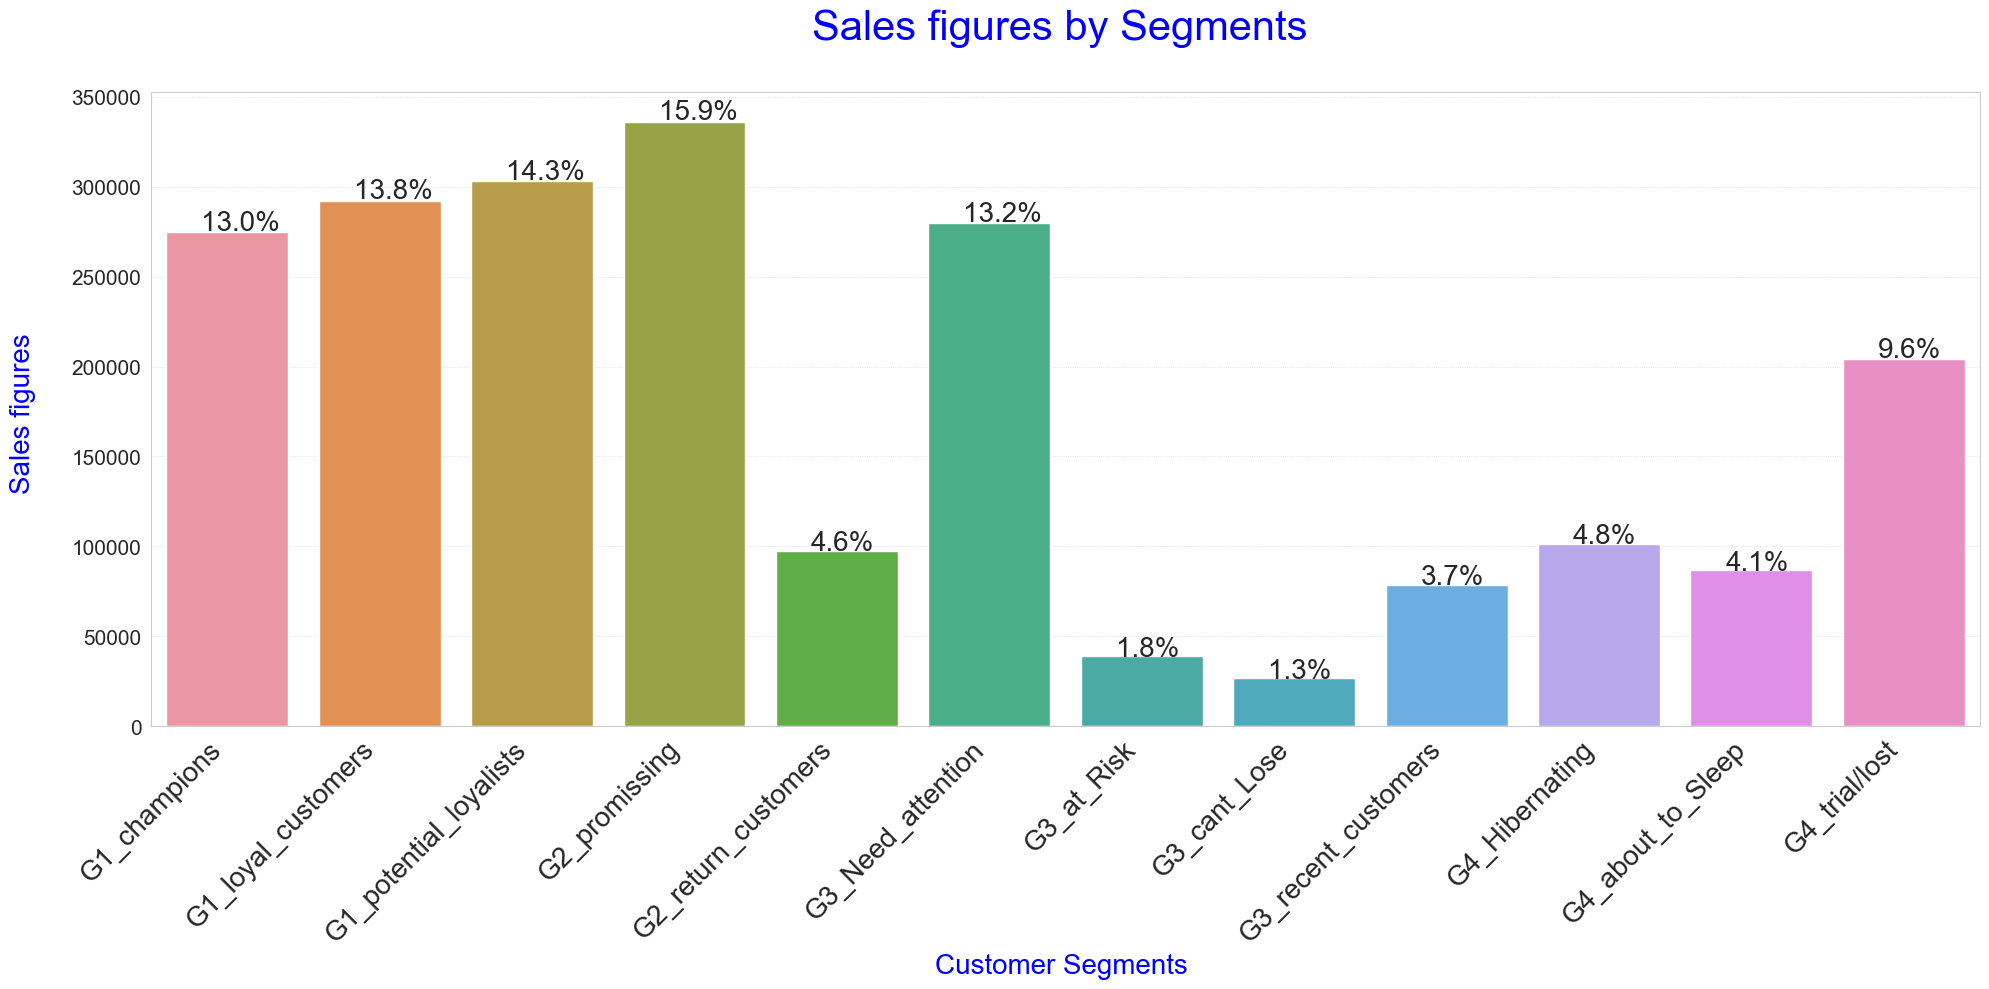

In [212]:
### Plot the customer segments based on sales figures to see their proportion into the total sales of Wolt
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(figsize=(20,10))

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)
bar_ap = sns.barplot(data = segment_summary, x = 'segment', y ='total_order')

total = total_sales
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 20)

bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=45, ha = 'right')
plt.title('Sales figures by Segments \n', size = 30, color='blue')
plt.ylabel('Sales figures \n', size = 20,color="blue" )
plt.xlabel("Customer Segments ",fontsize = 20, color="blue" )
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.tight_layout()

In [227]:
segment_summary

segment  total_order  count  %sales_segment  \
0             G1_champions       274616    227           0.130   
1       G1_loyal_customers       292056    431           0.138   
2   G1_potential_loyalists       303023   1103           0.143   
3            G2_promissing       335972    824           0.159   
4      G2_return_customers        97469   1375           0.046   
5        G3_Need_attention       279774   1089           0.132   
6               G3_at_Risk        38884     89           0.018   
7             G3_cant_Lose        26681     43           0.013   
8      G3_recent_customers        78468    250           0.037   
9           G4_Hibernating       101448    776           0.048   
10       G4_about_to_Sleep        86642   1503           0.041   
11           G4_trial/lost       204424   4318           0.096   

    %customers_segment  
0                0.019  
1                0.036  
2                0.092  
3                0.069  
4                0.114  
5                0.091  
6                0.007  
7                0.004  
8                0.021  
9                0.065  
10               0.125  
11               0.359

In [237]:
group_names = segment_summary.segment

In [229]:
x = segment_summary
fig = px.treemap(x, path=[x.segment], values=x['count'])
fig.update_layout(title_text='Distribution of the RFM Segments by customer numbers', title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root", textfont =dict(size=14))
fig.show()


In [225]:
x = segment_summary
fig = px.treemap(x, path=[x.segment], values=x.total_order)
fig.update_layout(title_text='Distribution of the RFM Segments by sales figures', title_x=0.5,
                  title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root", textfont =dict(size=16))
fig.show()

<a id = "9"></a>
### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#1975D2; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #1975D2"> 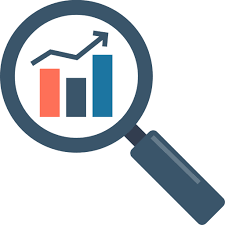PART 3 - CUSTOMER SEGMENT WITH EDA</p></div>

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
   <a class="alert alert-block alert-success" style="font-size:18px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>CUSTOMER SEGMENT WITH EDA</b><br>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#10" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    COMBINE WITH DEMOGRAPHIC DATA TO EXPLORE EACH SEGMENT<span class="badge badge-pill">3.1</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#11" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Georgia;font-size:100%;">#    SUGGEST CERTAIN STRATEGIES FOR RFM SEGMENTS - <span class="badge badge-success badge-pill">3.2</span></a>

</div>
</div>

<a id = "10"></a>
## <h1 align="center"><font color='#1975D2'>  <b> ※ COMBINE WITH DEMOGRAPHIC DATA TO EXPLORE EACH SEGMENT</font></h1></b><br></div>

In [231]:
#We drop some columns, prepare for further merging with customers table
RFM_table = RFM.drop(columns = ['recency_score','frequency_score','monetary_score','RFM_SCORE','count'], axis = 1)
RFM_table

user_id  recency  frequency  total_order  avg_order  \
0            2       60          1       38.456     38.456   
1            3      160         19      631.488     33.396   
2            8       18          1       19.228     19.228   
3           13        5         19      587.972     31.372   
4           14       53          2      118.404     59.708   
...        ...      ...        ...          ...        ...   
12023    21974       17          1       26.312     26.312   
12024    21976      188          4       22.264      6.072   
12025    21977      395          1       56.672     56.672   
12026    21979      283          1       26.312     26.312   
12027    21983      397          1        6.072      6.072   

                   segment  
0      G2_return_customers  
1        G3_Need_attention  
2      G2_return_customers  
3       G1_loyal_customers  
4      G2_return_customers  
...                    ...  
12023  G2_return_customers  
12024    G4_about_to_Sleep  
12025        G4_trial/lost  
12026        G4_trial/lost  
12027        G4_trial/lost  

[12028 rows x 6 columns]

In [248]:
RFM_table.to_csv('RFM_segment.csv')

In [233]:
### 
customer_segment = pd.merge(customers, RFM_table, left_on='USER_ID', right_on='user_id' )
customer_segment = customer_segment.drop(columns = ['REGISTRATION_DATE','FIRST_PURCHASE_DAY','LAST_PURCHASE_DAY','user_id', 'USER_ID','days_last_PO','TOTAL_PURCHASES_EUR','AVG_PURCHASE_VALUE_EUR','days_last_PO','registers',], axis = 1)

In [244]:
customer_segment.to_csv('Wolt_customers.csv')

In [241]:
### describe the group info
def information_group(customer_file, name):

    df = customer_file[customer_file['segment'] == name]
    print(f"The overall information of {name} group: \n {segment_summary[segment_summary.segment == name]}")
    print(f"\nThe nearest time ordered is {df.recency.min():0.0f} day(s), the longest time is {df.recency.max():0.0f} days, average time is {df.recency.mean():0.0f} days.")
    print(f"The least frequecy is {df.frequency.min():0.0f} time(s), the most frequecy is {df.frequency.max():0.0f} times, the average frequecy is {df.frequency.mean():0.0f} times.")
    print(f"The lowest order is {df.avg_order.min():0.0f} euros, the largest order is {df.avg_order.max():0.0f} euros, average order is {df.avg_order.mean():0.0f} euros.")

    print(f"The total orders by this group: {df['PURCHASE_COUNT'].sum()}, with {df['PURCHASE_COUNT_DELIVERY'].sum()} as delivery and {df['PURCHASE_COUNT_TAKEAWAY'].sum()} as takeaway.")
    print(f"The rate of customers mentioned their prefered restaurants is: {df['PREFERRED_RESTAURANT_TYPES'].count()/len(df)*100:0.1f}%.")
    print(f"The nationalities of this group are: \n{df['REGISTRATION_COUNTRY'].value_counts().sort_values(ascending = False).head(3)}.")

    group = df.describe().T
    group['total'] = group['count'] * group['mean']
    print(group.iloc[:-3 ][['mean','min','max','total']])

## <h3 align="center"><font color='#006600'>  <b> ※ DATA VISUALIZATION WITH POWER BI </font></h3></b><br></div>


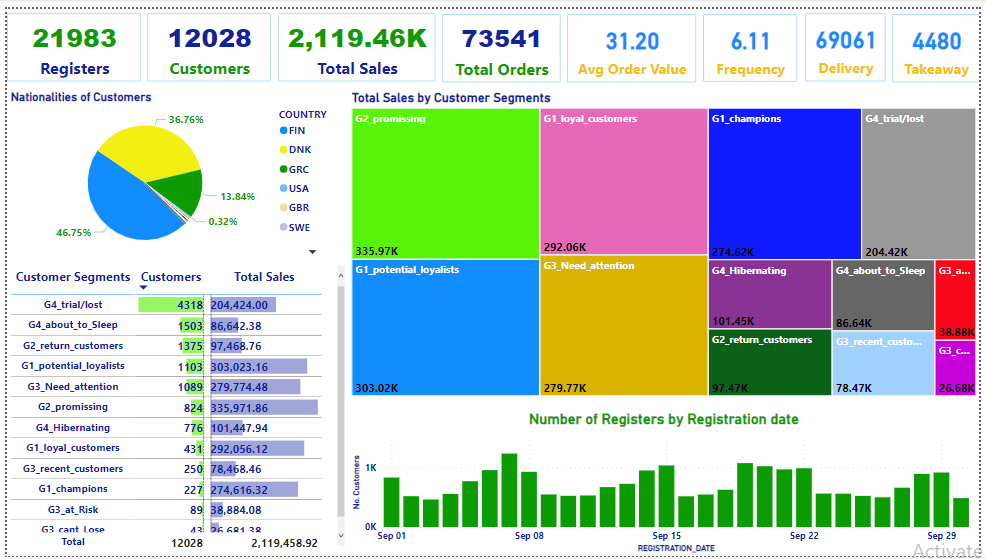

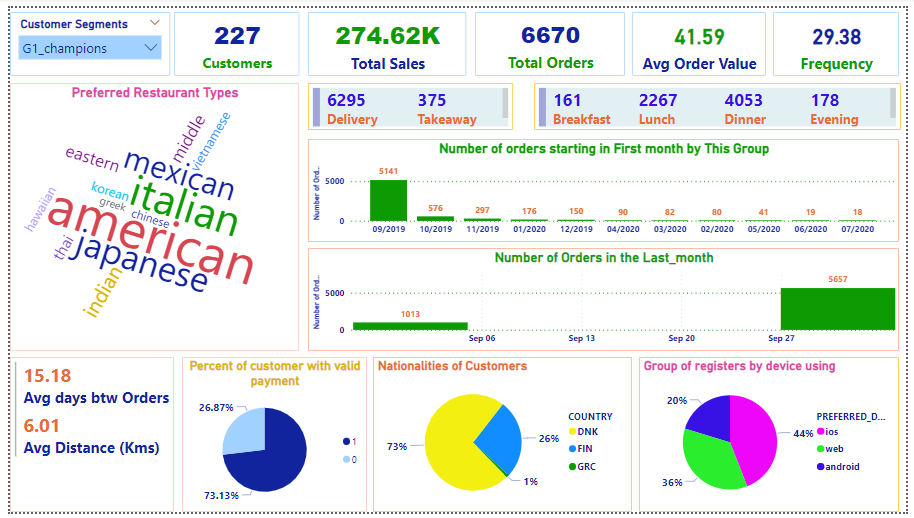

### The link for Power BI Dashboard
https://app.powerbi.com/view?r=eyJrIjoiODc0NjkxZDMtMWNkZC00ODdlLWEyYzEtMTFhNzBmMzQ4ODMzIiwidCI6IjdlNGQyZmQxLTY0MmItNDg4YS04YjU2LTMxYzkyMGY2YmUwYiIsImMiOjh9

<a id = "11"></a>
## <h1 align="center"><font color='#1975D2'>  <b> ※ SUGGEST CERTAIN STRATEGIES FOR RFM SEGMENTS</font></h1></b><br></div>

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Some comments about the customer segments :</u></b><br> 

* <b> G1 - The champions:</b><br>  1,9% of Wolt users but accounted for 13% sales figures  
* <b> G1 - The loyal customers:</b><br>  3,6% of Wolt users but accounted for 13,8% sales numbers
* <b> G1 - The potential loyals:</b><br>  9.2% Wolt users, accounted for 14,3% sales numbers   
=> The **G1 Group** is the Most Valuable Customer segments, with appx. 15% customer base, but contributed to 41% total transaction amount. These groups are the most loyal and value-creating segment and it is necessary for the business to focus their resources on these clusters of customers, providing them with more personalized services and promptly paying attention to their feedback, as well as personalized promotions, rewards programs, or exclusive offers that show appreciation for their loyalty.
    
* <b> G2-Promising/Return/Recent customers :</b><br>  20.4% Wolt customers, contributed to 24% total sales volume
=> The Important Customer groups is vital for the potential value with possible more transactions. We should have targeted campaigns in order to increase their engagement and loyalty, such as special offers to incentivize them to make a purchase, increasing their chances of becoming loyal customers in the future.
       
* <b> G3 - At Risk / Can't Lose / Need_attention customers:</b><br>  10,2% custmers with 16,3% sales
=> Needs-attention and promising segments - Since this group had not conducted many transactions and have the risk of leaving anytime we need to prioritize efforts to increase their engagement and loyalty, utilize some recalling strategies or incentives to bring the customers back. This could include personalized recommendations based on their purchase history or interests, or special offers to incentivize them to make a purchase.
    
* <b> G4 - Hibernating / Trial/Lost / About_Sleep :</b><br>  54.9% but just accounted for 18.5% sales total
=> For customers in the the Customer segments, since these types of customers are likely to be lost, unless we can arrange  additional resources or any specialized approaches, it should let them go since they won't cause significant losses anyway.
    
</div>